<a href="https://colab.research.google.com/github/SriSharanya-617/random_forest/blob/main/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/Social_Network_Ads.csv'
df=pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
x=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [10]:
y_pred=classifier.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8625

In [12]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("confsion_matrix",cm)

confsion_matrix [[47  5]
 [ 6 22]]


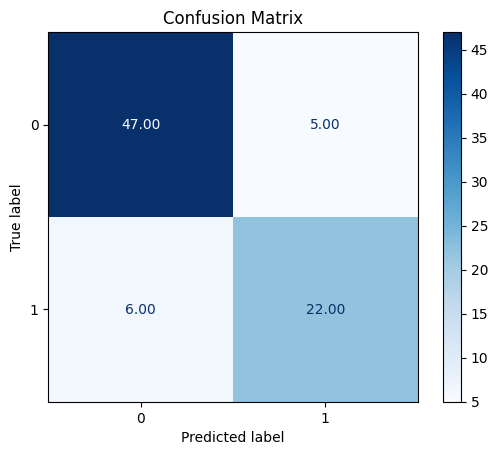

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Blues",values_format=".2f")
plt.title("Confusion Matrix")
plt.show()

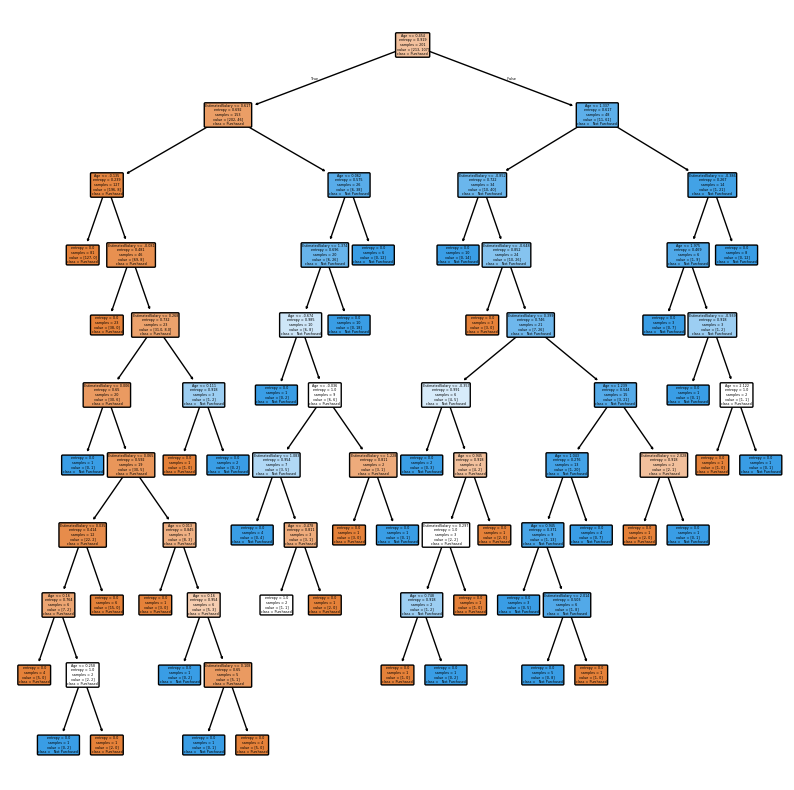

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
single_tree=classifier.estimators_[0]
plt.figure(figsize=(10,10))
plot_tree(single_tree,
          feature_names=["Age","EstimatedSalary"],
          class_names=["Purchased","  Not Purchased"],
          filled=True,
          rounded=True
)
plt.show()